In [31]:
pip install pywaffle

     |████████████████████████████████| 526 kB 5.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import texthero as hero
import nltk

#lecture du fichier 
df=pd.read_csv("./stockUniteLegaleActif.csv", sep=",", low_memory=False)
#df['clean_rs'] = hero.clean(df['denominationUniteLegale'])
#df.head(3)

from texthero import preprocessing
from texthero import stopwords
default_stopwords = stopwords.DEFAULT
custom_stopwords = default_stopwords.union(set(["-","SAINT","DE","LA","D","DU","DES","ET","SUR","LE","LES","L","A","ST","EN"]))

custom_pipeline = [ preprocessing.remove_stopwords]
#pass the custom_pipeline to the pipeline argument
df['clean_rs'] = hero.clean(df['denominationUniteLegale'], pipeline = custom_pipeline)
df['clean_rs'] = hero.remove_stopwords(df['clean_rs'], custom_stopwords)

df2=pd.DataFrame(hero.visualization.top_words(df['clean_rs']).head(100))

df2.head(60)


clean_rs
COMMUNE            36059
ACTION             16791
SOCIALE            16636
COM                10276
CTRE               10125
CENTRE              7544
COMMUNAL            6630
INTERCOMMUNAL       1752
SYND                1643
SI                  1456
SYNDICAT            1351
DIRECTION           1050
SCOLAIRE             977
SECTION              933
COMMUNAUTE           758
EAU                  726
COMMUNES             685
SIVU                 683
SIVOM                681
OFFICE               669
EHPAD                653
HOSPITALIER          632
VOCATION             616
INTERCOM             568
TOURISME             553
DEPARTEMENTALE       531
EAUX                 506
PAYS                 477
MAISON               473
REGIE                441
CC                   441
ASSOCIEE             439
INTER                427
POTABLE              420
RETRAITE             387
SAINTE               373
POUR                 352
PUBLIC               350
AMBASSADE            343
REGION               339
VALLEE               338
VAL                  330
GESTION              327
REGROUPEMENT         318
MARTIN               312
SOCIAL               307
ASSAINISSEMENT       305
SIVOS                300
SOUS                 286
PEDAGOGIQUE          281
BOIS                 265
GRAND                261
FRANCE               253
HABITAT              234
PIERRE               233
GENERAL              225
JEAN                 224
NATIONALE            222
PROTECTION           215
UNIQUE               214

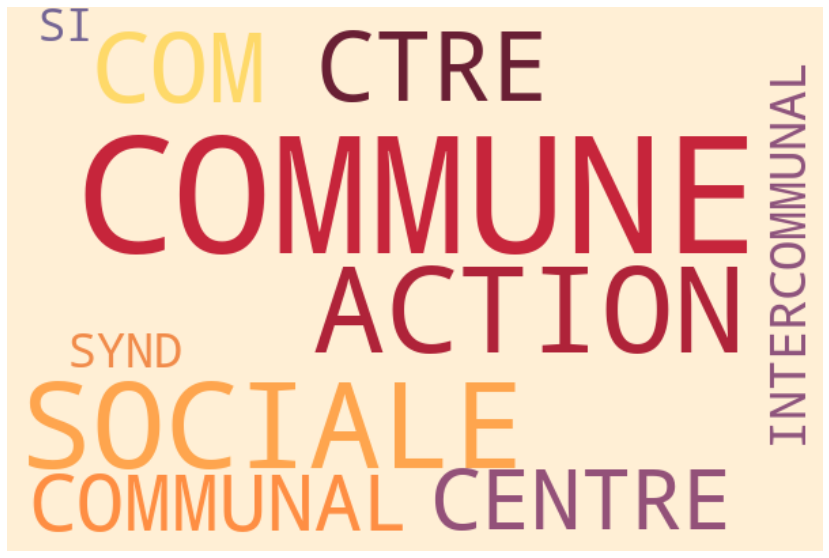

In [3]:
import pandas as pd 
import texthero as hero
import unicodedata
import numpy as np # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.display import display
import base64
import string
import re
from collections import Counter
from time import time
# from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from pywaffle import Waffle

from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.collocations import *
try:
    stopwords = set(stopwords.words('french'))
except LookupError:
    import nltk
    nltk.download('stopwords')
    stopwords = set(stopwords.words('french'))

## traitement premier niveau 

#lecture du fichier 
df=pd.read_csv("./stockUniteLegaleActif.csv", sep=",", low_memory=False)
#df['clean_rs'] = hero.clean(df['denominationUniteLegale'])
#df.head(3)

from texthero import preprocessing
from texthero import stopwords
default_stopwords = stopwords.DEFAULT
custom_stopwords = default_stopwords.union(set(["PIERRE","JEAN","'","-","VAL","POUR","SAINTE","GRAND","VALLEE","MARTIN","SAINT","AU","SOUS","BOIS","DE","LA","D","DU","DES","ET","SUR","LE","LES","L","A","ST","EN"]))


custom_pipeline = [ preprocessing.remove_stopwords]
#pass the custom_pipeline to the pipeline argument
df['clean_rs'] = hero.clean(df['denominationUniteLegale'], pipeline = custom_pipeline)
df['clean_rs'] = hero.remove_stopwords(df['clean_rs'], custom_stopwords)

#df2=pd.DataFrame(hero.visualization.top_words(df['clean_rs']).head(100))

#df2.head(60)



## traitement 2e niveau 

#lecture du fichier 
df=pd.read_csv("./stockUniteLegaleActif.csv", sep=",", low_memory=False)
#df['clean_rs'] = hero.clean(df['denominationUniteLegale'])
from texthero import preprocessing
from texthero import stopwords
default_stopwords = stopwords.DEFAULT

custom_pipeline = [ preprocessing.remove_stopwords]
#pass the custom_pipeline to the pipeline argument
df['clean_rs'] = hero.clean(df['denominationUniteLegale'], pipeline = custom_pipeline)
df['clean_rs'] = hero.remove_stopwords(df['clean_rs'], custom_stopwords)

tw = hero.visualization.top_words(df['clean_rs']).head(40)


def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('french') 
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

words = basic_clean(''.join(str(df['clean_rs'].tolist())))

#import plotly.express as px
#fig = px.bar(tw)
#fig.show()
#tw.head()


hero.wordcloud(df['clean_rs'], max_words=10,width=600, height=400)

#association de 2 mots 
#(pd.Series(nltk.ngrams(words, 2)).value_counts())[:30]

#visuation par code APE
#tw2 = hero.visualization.top_words(df['libelle']).head(40)



In [16]:
import pandas as pd
df=pd.read_csv("./stockUniteLegaleActif.csv", sep=",", low_memory=False)

# natural language processing: n-gram ranking
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
# add appropriate words that will be ignored in the analysis
ADDITIONAL_STOPWORDS = ["d'","d","a","saint","sainte"]

import matplotlib.pyplot as plt

def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('french') + ADDITIONAL_STOPWORDS
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

words = basic_clean(''.join(str(df['denominationUniteLegale'].tolist())))

(pd.Series(nltk.ngrams(words, 1)).value_counts())[:40]


(commune,)           36744
(sociale,)           16636
(action,)            11385
(com,)               10276
(ctre,)              10125
(centre,)             7549
(communal,)           6630
(daction,)            5405
(intercommunal,)      1752
(synd,)               1643
(si,)                 1493
(syndicat,)           1351
(direction,)          1050
(section,)             980
(scolaire,)            977
(st,)                  847
(communaute,)          758
(sivu,)                688
(sivom,)               685
(office,)              664
(ehpad,)               654
(hospitalier,)         632
(vocation,)            621
(intercom,)            568
(eau,)                 556
(tourisme,)            553
(departementale,)      531
(eaux,)                502
(pay,)                 477
(maison,)              473
(cc,)                  442
(regie,)               441
(associee,)            439
(inter,)               427
(potable,)             420
(retraite,)            387
(public,)              363
(

In [31]:
import pandas as pd 
import texthero as hero
import unicodedata
import numpy as np # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.display import display
import base64
import string
import re
from collections import Counter
from time import time
# from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from pywaffle import Waffle

from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.collocations import *
try:
    stopwords = set(stopwords.words('french'))
except LookupError:
    import nltk
    nltk.download('stopwords')
    stopwords = set(stopwords.words('french'))

## traitement premier niveau 

#lecture du fichier 
df=pd.read_csv("./stockUniteLegaleActif.csv", sep=",", low_memory=False)
#df['clean_rs'] = hero.clean(df['denominationUniteLegale'])
df.head(3)

#hero.visualization.top_words(df['libelle']).head(40)

siren sigleUniteLegale etatAdministratifUniteLegale  \
0   59804062              RTM                            A   
1  200000651             SITS                            A   
2  200016632              NaN                            A   

                          denominationUniteLegale  \
0             REGIE DES TRANSPORTS METROPOLITAINS   
1            SYND TRANSPORT SCOLAIRE VALLEE RENNE   
2  SYNDICAT INTERCOM TRANSPORT URBAIN TOUT' ENBUS   

   categorieJuridiqueUniteLegale activitePrincipaleUniteLegale  \
0                           4110                        49.31Z   
1                           7353                        49.31Z   
2                           7353                        49.31Z   

   nicSiegeUniteLegale    code                                       libelle   
0                   87  49.31Z  Transports urbains et suburbains de voyageurs  
1                   14  49.31Z  Transports urbains et suburbains de voyageurs  
2                   16  49.31Z  Transports urbains et suburbains de voyageurs